# Research Methods <br>UHH - Knowledge Technology Research Group - WiSe 2023/2024
## Assignment #6 - Bayesian Inference & Hypothesis Testing

***
### Group: B
### Names of members: Volha Stehling, Nhat Minh Phuong Nguyen, Kashf Jahangir

***

### Instructions:

Please answer the questions below. Copy this notebook and enter your answers underneath each task description, inserting cells as needed. You may use a combination of [python 3](https://www.python.org), [markdown](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html), and [LaTex](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd) to formulate your responses. In order to successfully complete the assignment, you will need the lecture material provided in the [RM moodle course](https://lernen.min.uni-hamburg.de/course/view.php?id=2637), especially L10 & L11.

**Make sure to use only a copy of this notebook for your answers instead of a new/blank notebook.**

### Grading Criteria:

In order to successfully pass this assignment, you will need **at least a total of 70 points out of 100 points**, and every task has to be tackled.

### Submission:

<span style="color: red">**Please note that the deadline for the submission of this assignment falls on a Monday!**</span>

Please upload the following two files **until Monday, January 20, 2025, 20:00 CET (Germany)** together in a .zip archive in moodle:
1. a (single) copy of this jupyter notebook containing your answers for all tasks (file extension: .ipynb)
2. an [exported PDF document](https://jupyterlab.readthedocs.io/en/stable/user/export.html) of the jupyter notebook (file extension: .pdf)

### Presentation:

Make sure that each (!) group member takes part in solving this assignment and is prepared to answer questions and/or present solutions from your submitted notebook during our assignment revision meeting scheduled for **Wednesday, January 22, 2025, 10:00 - 13:00 CET (Germany)**.

### File Naming:

Add the group letter to the file name prior to submission. For example, if your group letter is "A" (see group selection in moodle), you would use the following filename: 
1. RM_A06_Group_A.ipynb 
2. RM_A06_Group_A.pdf

***
***

#### Task 1 **[40 points] Bayes Parameter Estimation** 

Please answer each of the following three questions with step-by-step calculations **and thorough answers/explanations**, using python code and suitable plots. 
1. **Scenario:** You are an astronomer investigating the prevalence of exoplanets around a particular type of star in a nearby galaxy cluster. From extensive surveys, you know that approximately 15% of these stars host an exoplanet. Your telescope’s detection system is quite sensitive: if a star truly has an exoplanet, the system will indicate a detection 90% of the time (true positive rate). However, the system still produces a small fraction of false positives: 5% of stars without exoplanets are incorrectly flagged as having one. Now suppose you receive a detection signal from one star under observation.

    **Question:** Using Bayes’ Theorem, calculate the probability that this star truly hosts an exoplanet, given that the telescope indicated a detection.<br><br>

2. **Scenario:** You have two identical-looking boxes on your desk, each containing small toy blocks of different colors. Specifically:

    - Box A has 4 red blocks and 6 green blocks.<br>
    - Box B has 7 red blocks and 3 green blocks.<br><br>

    You randomly choose one box (each with 50% probability) and then randomly draw one block from that box.

    **Questions:** <br>
    (a) What is the probability of drawing a red block?<br>
    (b) Given that you drew a red block, what is the probability that it came from Box B?<br><br>

3. **Scenario:** You are playing a game of Dungeons & Dragons and facing a main villain controlled by the Dungeon Master (DM). This villain always makes attacks with two weapons, but you only observe the total of the damage rolls (the sum of both dice) on each attack. You know that each weapon die must be one of the four types d6, d8, d10 or d12 (dX = X-sided die) and there is no duplication of weapons—meaning the two dice must be different (for example, the pair could be a d6 and d8, but not two d6s). Your working hypothesis is that the DM is using a d8 and a d10.<br><br>
    **Question:** What is the probability that your hypothesis is correct, given the most recent six total damage values (the last six attack rolls) have been [6, 12, 14, 11, 9, 10]?

### Solution
1. *Using Bayes’ Theorem, calculate the probability that this star truly hosts an exoplanet, given that the telescope indicated a detection.*

Bayes' Theorem is given as:

$P(H|D) = \frac{P(H) \cdot P(D|H)}{P(D)}$

Where:

- $H$ - the hypothesis that the star hosts an exoplanet, <br> and $H_0 = \neg H$ - the alternative hypothesis that the star does not host an exoplanet.
- $P(H)$: **Prior** probability that the star has an exoplanet.
- $P(H|D)$: **Posterior** probability that the star truly has an exoplanet ($H$) given a detection signal ($D$).
- $P(D|H)$: Probability of detection if the star truly has an exoplanet (**true positive rate**).
- $P(D)$: Total probability of receiving a detection signal (**normalizing constant / marginal likelihood**).

Known Probabilities From the problem:
- $P(H) = 0.15$ : 15% of stars host exoplanets.
- $P(D|H) = 0.9$ : true positive rate (probability of detecting an exoplanet when there is one).
- $P(D) = P(D|H) \cdot P(H) + P(D|H_0) \cdot P(H_0)$ : the total probability of observing a detection $(D)$. 
- $P(D|H_0) = 0.05$ : false positive rate (probability of detecting an exoplanet when there is none).
- $P(H_0) = 1 - P(H) = 0.85$.

Plugging the above into the formula, let's compute the posterior:

$P(H|D) = \frac{P(H) \cdot P(D|H)}{P(D)} = \frac{0.15 \cdot 0.9}{0.9 \cdot 0.15 + 0.05 \cdot 0.85} \approx 0.7606$ (**76.06%**)

In [1]:
# Define probabilities
p_H = 0.15  # Prior: star has exoplanet (p(H))
p_D_given_H = 0.9  # Likelihood: True positive rate (p(D|H))
p_D_given_not_H = 0.05  # False positive rate (p(D|~H))
p_not_H = 1 - p_H  # Complement of p(H): Probability star does not have an exoplanet (p(~H))

# Total probability of detection p(D)
p_D = (p_D_given_H * p_H) + (p_D_given_not_H * p_not_H)

# Posterior probability p(H|D)
p_H_given_D = (p_D_given_H * p_H) / p_D

p_H_given_D

0.7605633802816901

In [2]:
import matplotlib.pyplot as plt

# Setting up plotting styles
plt.style.use("seaborn-v0_8-darkgrid")

# Set font sizes globally
plt.rcParams.update({
    'axes.titlesize': 16,   # Title font size
    'axes.labelsize': 14,   # Axis labels font size
    'xtick.labelsize': 14,  # X-tick labels font size
    'ytick.labelsize': 14,  # Y-tick labels font size
    'legend.fontsize': 14,  # Legend font size
    'font.size': 14         # General font size
})

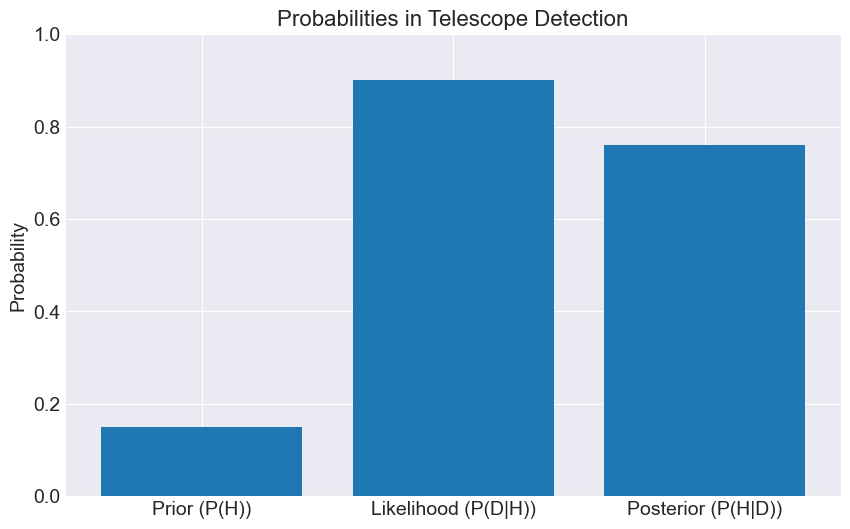

In [3]:
import matplotlib.pyplot as plt

# Probabilities with new naming conventions
prior = p_H  # p(H): Prior
likelihood = p_D_given_H  # p(D|H): Likelihood
posterior = p_H_given_D  # p(H|D): Posterior

plt.figure(figsize=(10, 6))

labels = ['Prior (P(H))', 'Likelihood (P(D|H))', 'Posterior (P(H|D))']
values = [prior, likelihood, posterior]

plt.bar(labels, values)
plt.ylim(0, 1)
plt.title('Probabilities in Telescope Detection')
plt.ylabel('Probability')
plt.show()

This chart is a visualization of the relationship between
- **Prior (P(H):** The initial likelihood of a star hosting an exoplanet (15%).
- **Likelihood (P(D|H)):** The probability that the telescope detects an exoplanet if one exists (90%).
- **Posterior (P(H|D)):** The probability that the star hosts an exoplanet after observing a detection signal (76%). 

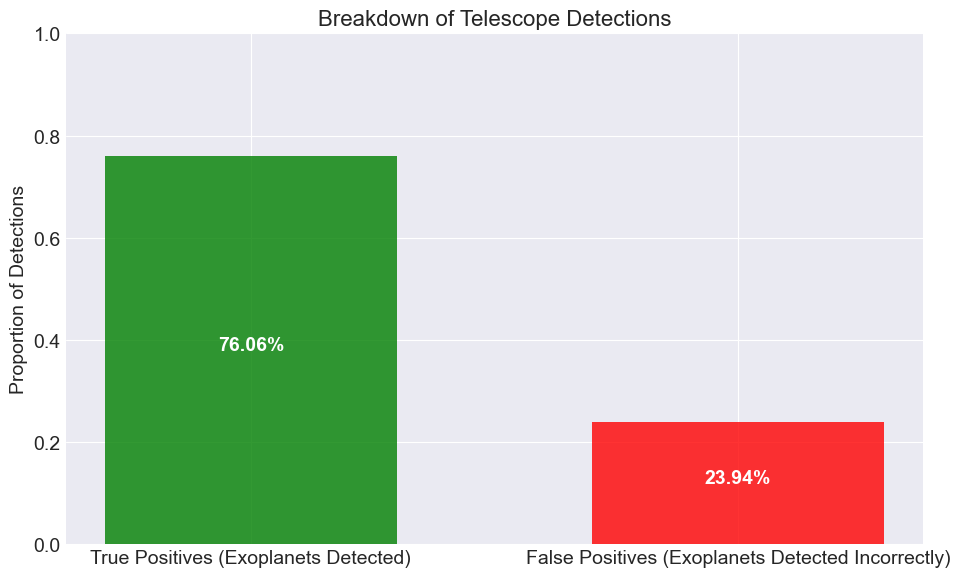

In [5]:
total_stars = 1000  # Total number of stars for visualization
p_H = 0.15  # Probability a star has an exoplanet (prior)
p_D_given_H = 0.90  # Probability of detection given exoplanet (true positive rate)
p_D_given_not_H = 0.05  # Probability of detection given no exoplanet (false positive rate)

# Calculations
stars_with_exoplanets = total_stars * p_H
stars_without_exoplanets = total_stars - stars_with_exoplanets

true_positives = stars_with_exoplanets * p_D_given_H  # Detected exoplanets (true positives)
false_positives = stars_without_exoplanets * p_D_given_not_H  # False detections (false positives)

# Total detections
total_detections = true_positives + false_positives

# Proportions for visualization
true_positive_rate = true_positives / total_detections
false_positive_rate = false_positives / total_detections

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
categories = ['True Positives (Exoplanets Detected)', 'False Positives (Exoplanets Detected Incorrectly)']
values = [true_positive_rate, false_positive_rate]

ax.bar(categories, values, width=0.6, color=['green', 'red'], alpha=0.8)
ax.set_title('Breakdown of Telescope Detections')
ax.set_ylabel('Proportion of Detections')
ax.set_ylim(0, 1)
ax.text(0, true_positive_rate / 2, f'{true_positive_rate:.2%}', ha='center', color='white', weight='bold')
ax.text(1, false_positive_rate / 2, f'{false_positive_rate:.2%}', ha='center', color='white', weight='bold')

plt.tight_layout()
plt.show()

The bar chart shows the proportions of:

- **True Positives (Correctly Detected Exoplanets)**: The proportion of detections that correctly identify stars with exoplanets. This corresponds to stars where the system's detection aligns with reality.
- **False Positives (Exoplanets Detected Incorrectly)**: The proportion of detections where the system falsely flags stars without exoplanets as having one.

From the visualization:

A significant majority of detections are **true positives** ($\sim 76.06 \%$), aligning with the calculated probability.
A smaller proportion ($\sim23.94\%$) are **false positives**.

This chart visually supports the conclusion derived from Bayes' Theorem: **when a detection is made, there is a 76.06% probability that the star truly hosts an exoplanet**.

2. You have two identical-looking boxes on your desk, each containing small toy blocks of different colors. Specifically:
- Box A has 4 red blocks and 6 green blocks.
- Box B has 7 red blocks and 3 green blocks.

You randomly choose one box (each with 50% probability) and then randomly draw one block from that box.

a) *What is the probability of drawing a red block?* <br>
b) *Given that you drew a red block, what is the probability that it came from Box B?*

 **(a) Probability of Drawing a Red Block:**

 The total probability of drawing a red block ($P(\text{Red})$) for independent events:

$P(\text{Red}) = P(\text{Red}|\text{A}) \cdot P(\text{A}) + P(\text{Red}|\text{B}) \cdot P(\text{B})$

Where:
- $P(\text{Red}|\text{A})$: Probability of drawing a red block from Box A.
- $P(\text{Red}|\text{B})$: Probability of drawing a red block from Box B.
- $P(\text{A})$ and $P(\text{B})$: Probabilities of choosing Box A and Box B, respectively.


From the definition of the Scenario:
- $P(\text{A}) = P(\text{B}) = 0.5$.
- $P(\text{Red}|\text{A}) = \frac{4}{4+6} = 0.4$ (4 red blocks out of 10 in Box A).
- $P(\text{Red}|\text{B}) = \frac{7}{7+3} = 0.7$ (7 red blocks out of 10 in Box B).

Substituting these values:

$P(\text{Red}) = 0.4 \cdot 0.5 + 0.7 \cdot 0.5 = 0.20 + 0.35 = 0.55$ (**55%**)

**Result:** The probability of drawing a red block is **55%** (**0.55**).

 **(b) Probability of Box B Given a Red Block:**

Using Bayes’ Theorem, the probability that the block came from Box B given it is red is:

$P(\text{B}|\text{Red}) = \frac{P(\text{Red}|\text{B}) \cdot P(\text{B})}{P(\text{Red})}$

Where:
- $P(\text{Red}|\text{B}) = 0.7$: Probability of drawing a red block from Box B (calculated in part (a)).
- $P(\text{B}) = 0.5$: Probability of choosing Box B.
- $P(\text{Red}) = 0.55$: The total probability of drawing a red block (calculated in part (a)).
Substituting these values:

$P(\text{B}|\text{Red}) = \frac{0.7 \cdot 0.5}{0.55} = \frac{0.35}{0.55} \approx 0.636$ (**~63.6%**)

**Result:** The probability that the red block came from Box B, given that a red block was drawn, is approximately **63.64%** (**0.636**).

In [6]:
# Given probabilities and block counts

# Box probabilities
P_box_A = 0.5  # Probability of choosing Box A
P_box_B = 0.5  # Probability of choosing Box B

# Block distributions in each box
red_A = 4  # Red blocks in Box A
green_A = 6  # Green blocks in Box A
total_A = red_A + green_A  # Total blocks in Box A

red_B = 7  # Red blocks in Box B
green_B = 3  # Green blocks in Box B
total_B = red_B + green_B  # Total blocks in Box B

# (a) Probability of drawing a red block
# Using the law of total probability
P_red_given_A = red_A / total_A  # Probability of red block from Box A
P_red_given_B = red_B / total_B  # Probability of red block from Box B

# Total probability of drawing a red block
P_red = (P_red_given_A * P_box_A) + (P_red_given_B * P_box_B)

# (b) Probability of Box B given that a red block is drawn
# Using Bayes' Theorem
P_B_given_red = (P_red_given_B * P_box_B) / P_red

P_red, P_B_given_red

(0.55, 0.6363636363636362)

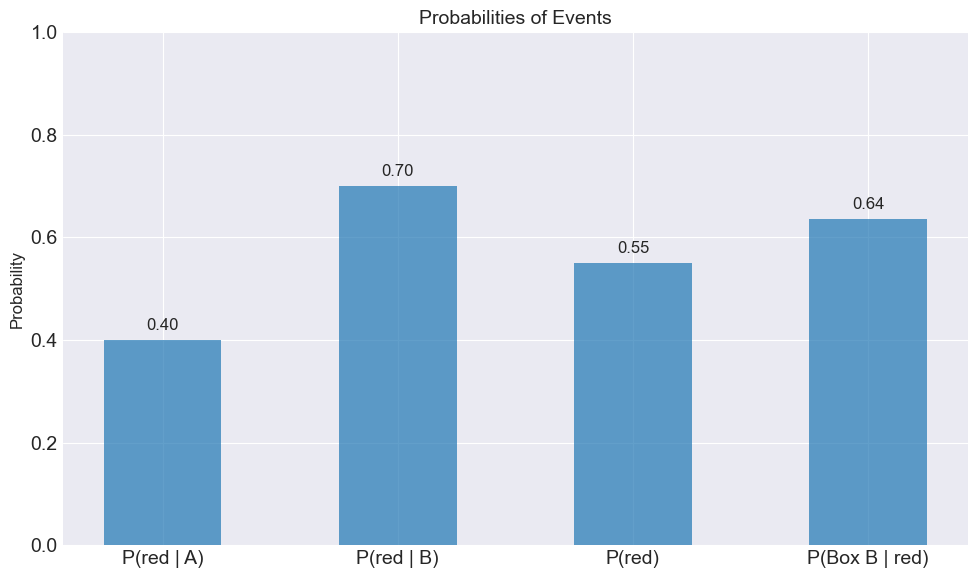

In [7]:
# Visualization of probabilities

# Data for the chart
categories = ['P(red | A)', 'P(red | B)', 'P(red)', 'P(Box B | red)']
values = [P_red_given_A, P_red_given_B, P_red, P_B_given_red]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(categories, values, alpha=0.7, width=0.5)
ax.set_ylim(0, 1)
ax.set_ylabel('Probability', fontsize=12)
ax.set_title('Probabilities of Events', fontsize=14)

# Annotating the bars
for i, value in enumerate(values):
    ax.text(i, value + 0.02, f'{value:.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()

The bar chart illustrates the probabilities for both a and b parts of the task:
1. $P(\text{red}|\text{A})$ and $P(\text{red}|\text{B})$:
   - These represent the probabilities of drawing a red block if Box A or Box B is chosen.
   - $P(\text{red}|\text{B})$ is higher (0.7) because Box B contains more red blocks than Box A.
2. $P(\text{red})$:
   - The overall probability of drawing a red block, combining contributions from both boxes, is 0.55 (55\%).
3. $P(\text{B}|\text{red})$:
   - The probability that a red block came from Box B, given that a red block was drawn, is 0.636 (63.64\%).

3. *What is the probability that your hypothesis is correct, given the most recent six total damage values (the last six attack rolls) have been [6, 12, 14, 11, 9, 10]?*

**Problem Restatement**
- The villain uses exactly **two different** dice, chosen from $\{ d6, d8, d10, d12 \}$.
- That means there are $\binom{4}{2} = 6$ possible distinct pairs (**possible hypotheses**):
$(d6, d8), (d6, d10), (d6, d12), (d8, d10), (d8, d12), (d10, d12)$.
- Our hypothesis, $H$, is that the pair is $(d8, d10)$.
- We observe **only the sum** of the two dice (e.g., if the DM rolled a 2 on the d8 and a 6 on the d10, the total is 8).
- We observe the last six sums (observed data $D$): $[6, 12, 14, 11, 9, 10]$.

We want:

$P(H|D) = P(d8, d10 \mid \text{rolls} = [6, 12, 14, 11, 9, 10]).$

This is a Bayesian inference problem where we assess the likelihood of a hypothesis (the DM is using a **d8** and a **d10**) given observed data (damage values).

We use Bayes' Theorem to compute the posterior probability:

$P(H|D) = \frac{P(D|H) \cdot P(H)}{P(D)}$

Where:
- $P(H|D)$ - Probability that the DM is using **d8 and d10**, given the observed rolls.
- $P(D|H)$ - Likelihood of the observed damage rolls occurring under this hypothesis.
- $P(H)$ - Prior probability of this hypothesis. Each hypothesis is equally likely initially, so we assign a uniform prior: $P(H)=\frac{1}{6}$ for each hypothesis.
- $P(D)$ - **Total probability of the observed data** over all possible dice combinations.

**Calculating Likelihood $P(D|H)$**

For each hypothesis, we must:
1. Simulate all possible sums of the two dice.
2. Calculate the probability distribution of these sums.
3. Compute the probability of getting the observed damage values.

For the **d8 and d10 hypothesis**, the possible sums range from: $1 + 1 = 2$ to $8 + 10 = 18$.

The probability of each sum occurring is calculated based on the number of ways to roll it. For each observed value (6, 12, 14, 11, 9, 10), we find its probability from this distribution. The likelihood $P(D|H)$ is the **product** of these probabilities.

**Calculating Normalized Constant P(D)**

The total probability of the observed data $P(D)$ is:

$P(D) = \sum_{i} P(D|H_i) \cdot P(H_i)$

where $H_i$ represents all dice pairings. Once we compute this, we can normalize $P(H|D)$.

*An Observation: Proportionality*

*Since we are only considering one hypothesis (d8 + d10) and not comparing it directly with others, we don't really need the exact value of $P(D)$.
Computing $P(D)$ is hard. Instead, we could've compared hypotheses based on their relative probabilities without explicitly computing $P(D)$. Since $P(D)$ is the same across all hypotheses, we only need the numerator: $P(H|D) \propto P(D|H) \cdot P(H)$*


Below is a **Python implementation** (since calculating it manually is rather tedious) that does the following:
- Simulates all dice pairings.
- Computes probability distributions for each.
- Calculates likelihoods $P(D|H)$.
- Computes total probability of the observed data $P(D)$.
- Computes final posterior probability $P(H|D)$.

In [256]:
# Re-import necessary libraries
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# All possible dice pairings
dice_pairs = [(6, 8), (6, 10), (6, 12), (8, 10), (8, 12), (10, 12)]
observed_values = [6, 12, 14, 11, 9, 10]  # Observed damage rolls

# Likelihoods for each hypothesis
likelihoods = {}

# Compute likelihood for each hypothesis
for die1, die2 in dice_pairs:
    # Generate all possible sums
    dice1_vals = list(range(1, die1 + 1))
    dice2_vals = list(range(1, die2 + 1))
    sums = [r1 + r2 for r1 in dice1_vals for r2 in dice2_vals]

    # Compute frequency distribution of sums
    sum_counts = Counter(sums)
    total_rolls = len(dice1_vals) * len(dice2_vals)

    # Convert to probabilities
    sum_probabilities = {s: count / total_rolls for s, count in sum_counts.items()}

    # Compute likelihood P(D | H) as the product of observed values' probabilities
    likelihood = np.prod([sum_probabilities.get(value, 0) for value in observed_values])
    
    # Store likelihood
    likelihoods[(die1, die2)] = likelihood

# Compute P(D) by summing over all hypotheses
P_D = sum(likelihoods.values())

# Compute the true posterior probability P(H | D) for our hypothesis (d8, d10)
P_H_given_D = likelihoods[(8, 10)] / P_D

print("Posterior Probability: ", P_H_given_D)

Posterior Probability:  0.2512448652912795


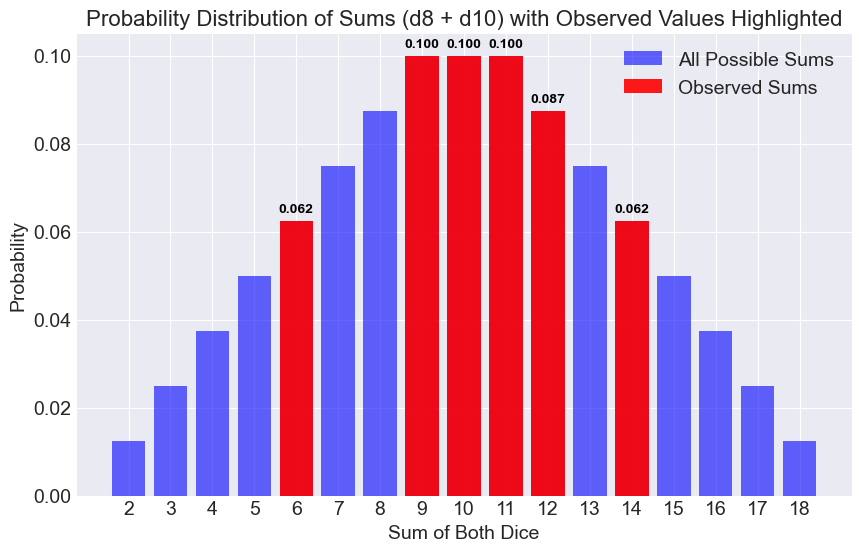

In [9]:
# d8 + d10 sum distribution
d8_vals = list(range(1, 9))
d10_vals = list(range(1, 11))
sums_d8_d10 = [r1 + r2 for r1 in d8_vals for r2 in d10_vals]

# Frequency distribution
sum_counts_d8_d10 = Counter(sums_d8_d10)
total_rolls_d8_d10 = len(d8_vals) * len(d10_vals)
sum_probabilities_d8_d10 = {s: count / total_rolls_d8_d10 for s, count in sum_counts_d8_d10.items()}

# Define observed values
observed_values = [6, 12, 14, 11, 9, 10]

# Create a new plot highlighting the observed values
plt.subplots(figsize=(10, 6))

# Plot full distribution in blue
plt.bar(sum_probabilities_d8_d10.keys(), sum_probabilities_d8_d10.values(), color='blue', alpha=0.6, label="All Possible Sums")

# Highlight observed values in red
highlighted_probs = {val: sum_probabilities_d8_d10.get(val, 0) for val in observed_values}
plt.bar(highlighted_probs.keys(), highlighted_probs.values(), color='red', alpha=0.9, label="Observed Sums")

# Add probability labels for observed values
for val, prob in highlighted_probs.items():
    plt.text(val, prob + 0.002, f"{prob:.3f}", ha='center', fontsize=10, fontweight='bold', color='black')

# Formatting the plot
plt.title("Probability Distribution of Sums (d8 + d10) with Observed Values Highlighted")
plt.xlabel("Sum of Both Dice")
plt.ylabel("Probability")
plt.xticks(range(min(sums_d8_d10), max(sums_d8_d10) + 1))
plt.legend()
plt.show()

The plot shows probability of rolling each sum when using a d8 and d10. This distribution tells us how likely it is to observe each damage value in the game if the DM is using a d8 and d10. For example, sums like 9, 10 and 11  are more frequent because they can be achieved in multiple ways (e.g., 4+6, 5+5, 6+4). Extreme values (like 2 and 18) are less likely because they only occur from (1+1) or (8+10).

We can also see that the values that we observed are among the most likely sum values, which means that our hypothesis that the DM is using a d8 and d10 is strongly supported.

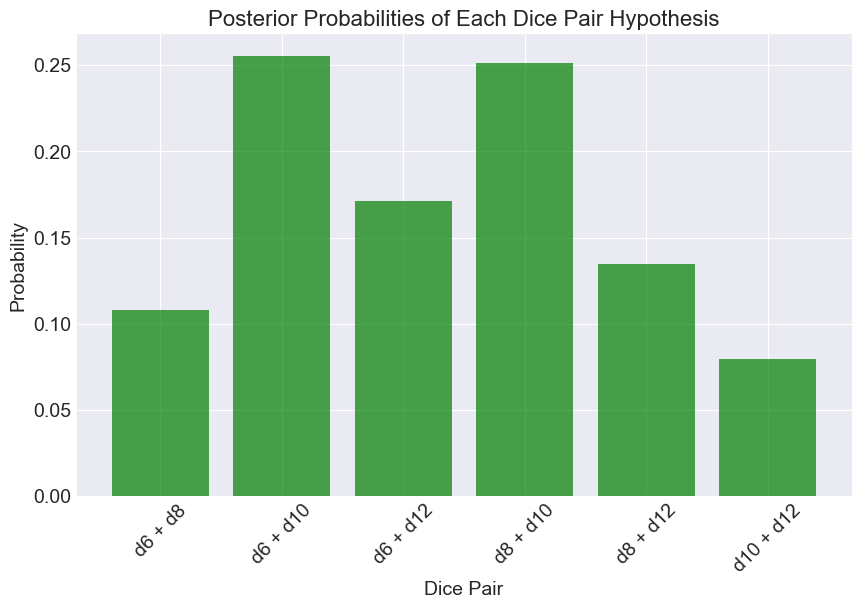

In [10]:
# Visualization 2: Posterior probabilities of all hypotheses
hypothesis_labels = [f"d{h1} + d{h2}" for h1, h2 in dice_pairs]
posterior_probs = [likelihoods[hypothesis] / P_D for hypothesis in dice_pairs]

# Plot posterior probabilities
plt.subplots(figsize=(10, 6))
plt.bar(hypothesis_labels, posterior_probs, color='green', alpha=0.7)
plt.title("Posterior Probabilities of Each Dice Pair Hypothesis")
plt.xlabel("Dice Pair")
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.show()

The plot shows The posterior probabilities for each hypothesis (possible dice pair). It allows us to compare the posterior probabilities for all possible dice pairings after seeing the observed damage values. Each bar represents the final computed probability that the DM is using that specific dice pair.

Our hypothesis (d8, d10) has a posterior probability of 25.1%, it is one of the most likely single hypothesis but not overwhelmingly certain. Other dice pairing (d6, d10) is even a bit more possible.

**Final Answer:** $P(H | D) = 0.251 \text{(25.1\%)}$

This means **there is a 25.1% chance that the DM is using a d8 and d10, given the observed damage rolls**.

#### Task 2 **[60 points] Savage-Dickey Method**

Returning to the Dungeons & Dragons scenario from task 1.3, our goal is now to test and evaluate the hypothesis that the DM uses a combination of the two dice d8 and d10.
1. Name one uninformed and one informed prior you would pick for the upcoming hypothesis test and motivate your decision for choosing these priors.<br>
2. You now want to follow the Savage-Dickey method for testing your hypothesis that the DM uses the combination of d8 and d10. State $H_0$, $H_1$, $\theta$ and $\theta_0$ for this specific case.
3. Perform the hypothesis test following the Savage-Dickey method using the **uninformed prior** that you previously chose. Show your calculation steps in python as well as the resulting Bayes factor.<br>
4. Repeat the test, but this time using the **informed prior**. Show again intermediate steps and the resulting Bayes factor.<br>
5. Analyze, interpret, and compare both test outcomes from subtasks 2.3 and 2.4. Explain how to interpret the Bayes factor and give reasons for potential discrepancies between different kinds of priors.<br>
6. Given your test results, would you assume a different dice combination and why? Support your reasoning with a suitable diagram and explain your choice.<br>

### TASK 2.1

**Uninformed Prior** 

Slightly lower for (d6, d8) and higher for (d10,d12).


| Dice Pair       | Normalized Prior Probability|
|-----------------|-----------------------------|
| d6, d8          | 0.1008 (10.08%)             |
| d6, d10         | 0.1261 (12.61%)             |
| d6, d12         | 0.1513 (15.13%)             |
| d8, d10         | 0.1681 (16.81%)             |
| d8, d12         | 0.2017 (20.17%)             |
| d10, d12        | 0.2521 (25.21%)             |

I chose this prior because:
- We did not know anything about the game, all we know are the dice.
- Although the chance of the DM randomly picking a (d8, d10) pair is 1/6 equally, but the later evidence that we use to update this prior probability is the <b>sum of attack rolls</b>, not which pair was being picked. Therefore, (d10, d12) can yield more possible results and has the highest prior chance. The same applies to other dice.
- If we keep an equal chance of 1/6 for every pairs, dice like (d8, d10) and (d10, d12) will be passed over by (d6, d8) so fast with just little evidence since (d8, d10) and (d10, d12) will likely to have lower likelihoods. So having (d10 d12) with higher prior rate will make it harder (requiring more evidence) for other pairs to actually stand out.


**Informed Prior** = With given evidence, we can update the prior, the informed prior is the scaled uninformed prior with the given evidence. \
| Dice Pair | Probability   |
|-----------|---------------|
| (6, 8)    | 0.1082 (10.82%) |
| (6, 10)   | 0.2552 (25.52%) |
| (6, 12)   | 0.1710 (17.10%) |
| (8, 10)   | 0.2512 (25.12%) |
| (8, 12)   | 0.1346 (13.46%) |
| (10, 12)  | 0.0798 (7.98%)  |

_This informed prior is based off a belief that choosing bigger dice creates a more unpredictable and dramatic outcome, which keeps the players more invested in the game._


In [275]:
import itertools

dice_pairs = {
    'd6, d8': (6, 8),
    'd6, d10': (6, 10),
    'd6, d12': (6, 12),
    'd8, d10': (8, 10),
    'd8, d12': (8, 12),
    'd10, d12': (10, 12)
}

# Calculate the number of outcomes for each pair
outcomes = {}
total_outcomes = 0

for pair, (die1, die2) in dice_pairs.items():
    possible_outcomes = list(itertools.product(range(1, die1 + 1), range(1, die2 + 1)))
    outcomes[pair] = len([sum(outcome) for outcome in possible_outcomes])
    total_outcomes += len(possible_outcomes)

print(outcomes)

prior_probabilities = {pair: num_outcomes / total_outcomes for pair, num_outcomes in outcomes.items()}

normalized_prior = {pair: probability / sum(prior_probabilities.values()) for pair, probability in prior_probabilities.items()}

# print(normalized_prior)
# Print the results
print(f"{'Dice Pair':<15} {'Normalized Prior Probability':<10}")
print("-" * 45)
for pair, probability in prior_probabilities.items():
    outcomes_count = outcomes[pair]
    print(f"{pair:<15} {probability:.4f} ({probability * 100:.2f}%)")
    

{'d6, d8': 48, 'd6, d10': 60, 'd6, d12': 72, 'd8, d10': 80, 'd8, d12': 96, 'd10, d12': 120}
Dice Pair       Normalized Prior Probability
---------------------------------------------
d6, d8          0.1008 (10.08%)
d6, d10         0.1261 (12.61%)
d6, d12         0.1513 (15.13%)
d8, d10         0.1681 (16.81%)
d8, d12         0.2017 (20.17%)
d10, d12        0.2521 (25.21%)


### TASK 2.2 2.3

$H_0$: The DM used any other possible combinations of two different dice except for (d8, d10). ($\theta \neq \theta_0$)

$H_1$: The DM used the combination of (d8, d10). ($\theta = \theta_0$)

$\theta$: The entire parameter space with all possible combinations of two different dice from the set {d6, d8, d10, d12}.

$\theta_0$: The (d8, 10) combination.

In [277]:
from empiricaldist import Pmf
import itertools
import numpy as np


# Observed totals from the DM's rolls
observed_totals = [6, 12, 14, 11, 9, 10]
dice_options = [6, 8, 10, 12]

dice_combinations = list(itertools.combinations(dice_options, 2))

priors_prob = list(normalized_prior.values())

likelihoods_prob = list(likelihoods.values())

uni_prior = dict(zip(dice_combinations, priors_prob))

c_likelihoods = dict(zip(dice_combinations, likelihoods_prob))



def calculate_likelihood(sums, die1, die2):
    possible_outcomes = list(itertools.product(range(1, die1 + 1), range(1, die2 + 1)))
    possible_sums = [sum(outcome) for outcome in possible_outcomes]
    likelihoods = [possible_sums.count(s) / len(possible_sums) for s in sums]
    return np.prod(likelihoods)

h1_combination = (8, 10)

likelihoods = {comb: calculate_likelihood(observed_totals, comb[0], comb[1]) for comb in dice_combinations}


posterior_prob_target = likelihoods[h1_combination] * uni_prior[h1_combination]

posterior_sum = sum(likelihood * uni_prior[h1_combination] for likelihood in likelihoods.values())
normalize_post = posterior_prob_target / posterior_sum

bayes_factor = normalize_post / uni_prior[h1_combination]

posteriors = {}

for i in dice_combinations:
    posterior_sum_1 = sum(likelihood * uni_prior[i] for likelihood in likelihoods.values())
    posteriors[i] = c_likelihoods[i] * uni_prior[i]
    posteriors[i] = posteriors[i] / posterior_sum_1
        


# print(pmf)
print(f"Bayes Factor for hypothesis (d8, d10): {bayes_factor:.4f}")

if bayes_factor > 1:
    print("The data supports the hypothesis that the DM uses the (d8, d10) pair.")
else:
    print("The data does not strongly support the hypothesis that the DM uses the (d8, d10) pair.")


Bayes Factor for hypothesis (d8, d10): 1.4949
The data supports the hypothesis that the DM uses the (d8, d10) pair.


A Bayes Factor of 1.4949 provides moderate support for the hypothesis that the DM uses the specified pair of dice over any other combination. This does not definitively confirm the hypothesis but suggests it might be plausible enough to warrant further consideration or additional data collection to draw stronger conclusions.

#### Task 2.4

In [278]:
# Previous posteriors as Informed Prior
for k, p in posteriors.items():
    print(f"{k} {p:.4f} ({p * 100:.2f}%)")


(6, 8) 0.1082 (10.82%)
(6, 10) 0.2552 (25.52%)
(6, 12) 0.1710 (17.10%)
(8, 10) 0.2512 (25.12%)
(8, 12) 0.1346 (13.46%)
(10, 12) 0.0798 (7.98%)


In [260]:
import numpy as np
import itertools
from scipy.stats import beta

# Defining informed bias
dice_options = [6, 8, 10, 12]
dice_combinations = list(itertools.combinations(dice_options, 2))
informed_prior_probs = [0.25, 0.1, 0.1, 0.15, 0.15, 0.25]
informed_prior = dict(zip(dice_combinations, informed_prior_probs))

def calculate_likelihood(sums, die1, die2):
    possible_outcomes = list(itertools.product(range(1, die1 + 1), range(1, die2 + 1)))
    possible_sums = [sum(outcome) for outcome in possible_outcomes]
    likelihoods = [possible_sums.count(s) / len(possible_sums) for s in sums]
    return np.prod(likelihoods)

observed_totals = [6, 12, 14, 11, 9, 10]

likelihoods = {comb: calculate_likelihood(observed_totals, comb[0], comb[1]) for comb in dice_combinations}

# Calculate posterior probabilities
posterior_probs = {comb: informed_prior[comb] * likelihoods[comb] for comb in dice_combinations}
total_posterior_prob = sum(posterior_probs.values())
normalized_posteriors = {comb: posterior_probs[comb] / total_posterior_prob for comb in dice_combinations}

h1_combination = (8, 10)
bayes_factor_informed = normalized_posteriors[h1_combination] / informed_prior[h1_combination]

print(f"Bayes Factor for hypothesis (d8, d10) with informed prior: {bayes_factor_informed:.4f}")


Bayes Factor for hypothesis (d8, d10) with informed prior: 1.7035


#### Task 2.5

#### Analysis of Results:
BF (uninformed prior): 1.5075
BF (informed prior): 1.7035
The BF value increases as we inttroduce the informed prior. While there is a change, both the evidences are still anectodal after introducing the informed bias. $BF_{10}$ values close to 2 only suggest mild favor for an alternative hypothesis. This means that the results are somewhat aligned with the true dice usage.

#### Interpretation of Bayes Factor
While $BF_{01}$ value greater than 1 indicate evidence in favor of $H_1$, it does not, by any means, indicate _strong_ evidence. Evidence label of 1 > $BF_{01}$ > 3 is _anecdotal_. This cannot be interpreted as strong evidence even though data i s 1.4 times more likely under  $H_{1}$.

This can be further highlighted by using the "urn" analogy, where  $BF_{01}$ = 11 is analogous to putting 11 red balls for  $H_{1}$ and one grey ball for  $H_{0}$ in an urn. When a ball is drawn from the urn, it highly likely that the ball is red. The analogy applies to smaller values of  $BF_{01}$.

#### Descrepancies between Different Kinds of Priors
- Uninformed Prior: This is the prior that is used without any prior knowledge or evidence. It assigns equal probability to all outcomes and stays neutral. Due to its neutrality, it is more sensitive to actual data collected.
- Informed Prior: This is the prior that is biased on the basis of evidence after the fact, historical data, or expert opinion. The accuracy of reflection of this informed prior is crucial. If it reflects the underlying reality, the results are more likely to show accurate results. If it reflects inaccurate biases, then it will skew the results and lead to misleading analysis.
    - For instance, if we base our informed prior on the assumption that the DM is more likely to pick smaller smaller combinations of dice i.e: (6,8): 0.3, (6,10): 0.25, (6,12): 0.15, (8,10): 0.15, (8,12): 0.1, (10,12): 0.05
    - Here's how the Bayes factor changes for the larger combination of (d10, d12):

In [10]:
import numpy as np
import itertools
from scipy.stats import beta

# Defining informed bias
dice_options = [6, 8, 10, 12]
dice_combinations = list(itertools.combinations(dice_options, 2))
informed_prior_probs = [0.3, 0.25, 0.15, 0.15, 0.1, 0.05]
informed_prior = dict(zip(dice_combinations, informed_prior_probs))

def calculate_likelihood(sums, die1, die2):
    possible_outcomes = list(itertools.product(range(1, die1 + 1), range(1, die2 + 1)))
    possible_sums = [sum(outcome) for outcome in possible_outcomes]
    likelihoods = [possible_sums.count(s) / len(possible_sums) for s in sums]
    return np.prod(likelihoods)

observed_totals = [6, 12, 14, 11, 9, 10]

likelihoods = {comb: calculate_likelihood(observed_totals, comb[0], comb[1]) for comb in dice_combinations}

# Calculate posterior probabilities
posterior_probs = {comb: informed_prior[comb] * likelihoods[comb] for comb in dice_combinations}
total_posterior_prob = sum(posterior_probs.values())
normalized_posteriors = {comb: posterior_probs[comb] / total_posterior_prob for comb in dice_combinations}

h1_combination = (10, 12)
bayes_factor_informed = normalized_posteriors[h1_combination] / informed_prior[h1_combination]

print(f"Bayes Factor for hypothesis (d10, d12) with informed prior: {bayes_factor_informed:.5f}")


Bayes Factor for hypothesis (d10, d12) with informed prior: 0.45051


The value dropping shows that the alternative hypothesis of smaller combinations being used is not likely.

#### Task 2.6

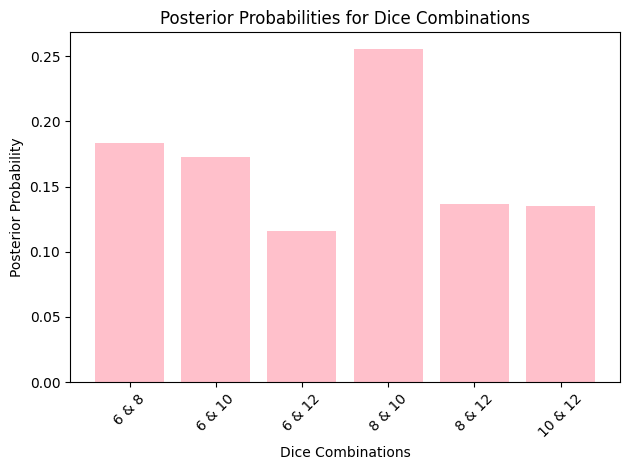

In [259]:
import matplotlib.pyplot as plt

# Plotting the posterior probabilities
combinations, probs = zip(*normalized_posteriors.items())
indexes = range(len(combinations))
labels = [f"{c[0]} & {c[1]}" for c in combinations]

plt.bar(indexes, probs, tick_label=labels, color='pink')
plt.xlabel('Dice Combinations')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probabilities for Dice Combinations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Given the results, the combinations (d8, d10) and (d6, d10) would be a suitable combination as they have the highest value for the Bayes Factor of 1.7035 and 1.7306, respectively.